# ITCS 5156 Final Project 
# House Price Prediction
Name: Mahjabin Hassan
ID: 801241980

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn



from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error


# This is a python magic command.
# This command allows the output of matplotlib to be displayed inline, i.e. under the cell.
%matplotlib inline

In [2]:
df = pd.read_csv('./house_price.csv') 
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


The house_price dataset has 81 columns (features) and 1460 rows (values).


In [3]:
#explore the first five rows
first_five_rows = df.head(5)
first_five_rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_describe = df.describe()
df_describe

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


It looks like that 38 columns were returned which means that those were numerical values data type int and float



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# names of features in the dataset
df_columns = list(df.columns)
df_columns

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [7]:
#looking for null values in df
null_df = df.isnull()
null_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [8]:
#checking for any missing values
check_NaN = df.isnull().values.any() # check for NaN values in dataframe
check_NaN

True

In [9]:
#counting the total number of missing values for each feature in df
total = df.isnull().sum().sort_values(ascending=False)
total.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [10]:
# calculating the percentage of missing data
percent = ((total/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
pd.set_option('display.max_rows', None)
missing_data

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


# DATA CLEANING

Looking at the above results, I decided to drop the features till Lotfrontage since most of the values are missing also dropping id as this only an id number of the houses.
Garage year built, garage condition, garage type, garge finish , garage quality all are also dropped as Garage Cars can give the same information and we don't have to deal with the missing any missing values this way.
Similarly dropping BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond,BsmtFinType1 since the basement features has no missing values and other basement features can give us the same information. MasVnrArea,MasVnrType are not important features for house price so deleting this would not affect the analysis.

In [11]:
# deleting unnecessary/repetitive features from df and store the new df in df_new
df_new = df.drop(['PoolQC','MiscFeature', 'Alley', 'Fence','FireplaceQu','LotFrontage', 'Id',
                 'GarageYrBlt','GarageCond','GarageType', 'GarageFinish', 'GarageQual', 
                 'BsmtFinType2', 'BsmtExposure','BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType'], axis=1)
df_new.head(5)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
df_new.shape

(1460, 62)

In [13]:
#next deleting rows with NaN values
df_new2 = df_new.dropna()
df_new2.shape

(1459, 62)

In [14]:
check_new_NaN = df_new2.isnull().values.any() # check for NaN values in dataframe
check_new_NaN

False

Finally we have a clean dataframe with no missing values
Lets save the dataframe as df_house

In [15]:
df_house = df_new2
df_house


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [16]:
df_house_describe  = df_house.describe()
df_house_describe

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,10517.363948,6.100069,5.575737,1971.244003,1984.850583,443.943797,46.581220,567.366004,1057.891021,...,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,42.310746,9984.666267,1.383171,1.113079,30.199555,20.644343,456.106417,161.369977,441.992392,438.500975,...,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,796.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,50.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,384.000000,0.000000,479.000000,992.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,712.500000,0.000000,808.000000,1298.500000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
# Data Exploration
sale_price_desc = df_house['SalePrice'].describe()
sale_price_desc

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

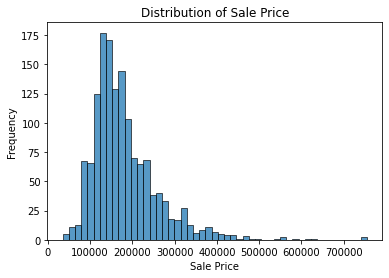

In [18]:
# Distribution plot of sale price of houses
sns.histplot(df_house['SalePrice'])
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [19]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1459 non-null   int64 
 1   MSZoning       1459 non-null   object
 2   LotArea        1459 non-null   int64 
 3   Street         1459 non-null   object
 4   LotShape       1459 non-null   object
 5   LandContour    1459 non-null   object
 6   Utilities      1459 non-null   object
 7   LotConfig      1459 non-null   object
 8   LandSlope      1459 non-null   object
 9   Neighborhood   1459 non-null   object
 10  Condition1     1459 non-null   object
 11  Condition2     1459 non-null   object
 12  BldgType       1459 non-null   object
 13  HouseStyle     1459 non-null   object
 14  OverallQual    1459 non-null   int64 
 15  OverallCond    1459 non-null   int64 
 16  YearBuilt      1459 non-null   int64 
 17  YearRemodAdd   1459 non-null   int64 
 18  RoofStyle      1459 non-null

In [20]:
#keeping only numeric data for regression analysis
#df_house_n is the new datframe that will be used for Machine learning models

df_house_n = df_house.select_dtypes(include=['int64']) 
df_house_n



,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
5,50,14115,5,5,1993,1995,732,0,64,796,...,40,30,0,320,0,0,700,10,2009,143000
6,20,10084,8,5,2004,2005,1369,0,317,1686,...,255,57,0,0,0,0,0,8,2007,307000
7,60,10382,7,6,1973,1973,859,32,216,1107,...,235,204,228,0,0,0,350,11,2009,200000
8,50,6120,7,5,1931,1950,0,0,952,952,...,90,0,205,0,0,0,0,4,2008,129900
9,190,7420,5,6,1939,1950,851,0,140,991,...,0,4,0,0,0,0,0,1,2008,118000


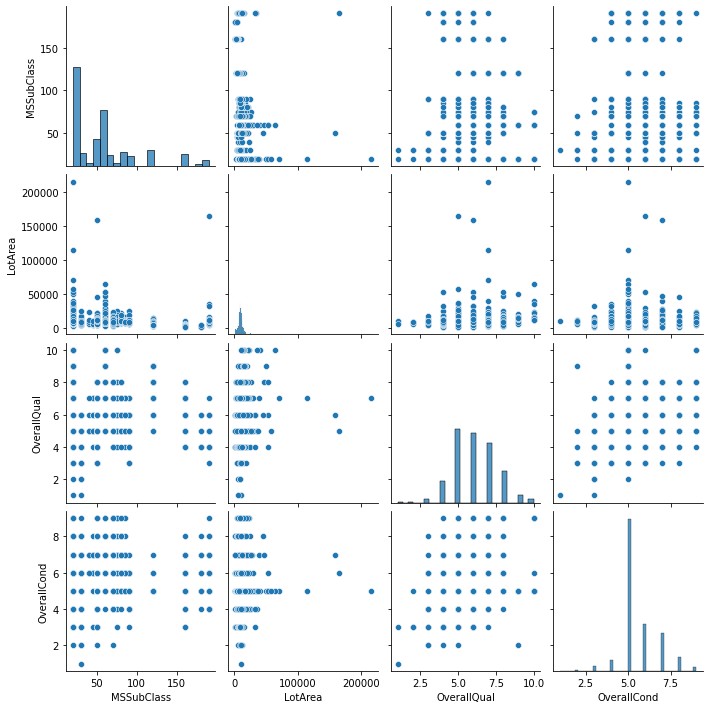

In [21]:
#Plotting the first four features 
sns.pairplot(df_house_n, 
    x_vars=["MSSubClass", "LotArea","OverallQual", "OverallCond"],
    y_vars=["MSSubClass", "LotArea","OverallQual", "OverallCond"],)

# ML MODELS

In [22]:
# Splitting data into test and train data
# 80% train data and 20% test data

from sklearn.model_selection import train_test_split

def data_splitting(data, target):
    X_train, X_test, t_train, t_test = train_test_split(data,target, test_size=0.2, random_state=0)
    return X_train, X_test, t_train, t_test

X_train, X_test, t_train, t_test = data_splitting(
    data = df_house_n.iloc[:, :33], 
    target = df_house_n['SalePrice']
)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (1167, 33)
Train target shape: (1167,)
Test data shape: (292, 33)
Test target shape: (292,)


# LINEAR REGRESSION

Test score/Accuracy: 0.8437564137343283

EVALUATION METRICS:
R2_score:  0.8437564137343283
MaxErr:  144408.4179855144
MAE:  21782.460958898362
MAPE:  0.13676206496804927
MSE:  949653271.4733695


Text(0.5, 1.0, 'Target against prediction for Linear Regression')

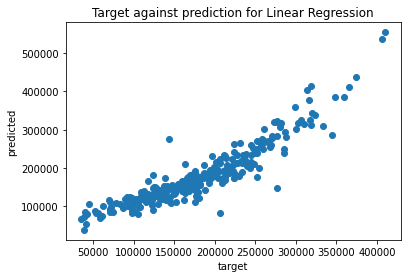

In [23]:
## LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

# Set universal seed for training
np.random.seed(0)

model1 = LinearRegression()

# Train model using the X_train and t_train.
model1.fit(X_train, t_train)

y1 = model1.predict(X_test)

test_score1 = model1.score(X_test,t_test)
print(f"Test score/Accuracy: {test_score1}")

# Evaluation metrics
print('\nEVALUATION METRICS:')
print('R2_score: ', r2_score(t_test, y1))
print('MaxErr: ', max_error(t_test,y1))      
print('MAE: ', mean_absolute_error(t_test, y1))
print('MAPE: ', mean_absolute_percentage_error(t_test, y1))      
print('MSE: ', mean_squared_error(t_test, y1))


#Plotting targets against predicted 
                
plt.scatter(y1,t_test)
plt.xlabel("target")
plt.ylabel("predicted")
plt.title("Target against prediction for Linear Regression")





# RIDGE REGRESSION

Test score/Accuracy: 0.8445160764819009

EVALUATION METRICS:
R2_score:  0.8445160764819009
MaxErr:  145322.99206565705
MAE:  21653.058038450068
MAPE:  0.13569852816307643
MSE:  945036018.1787478


Text(0.5, 1.0, 'Target against prediction for Ridge Regression')

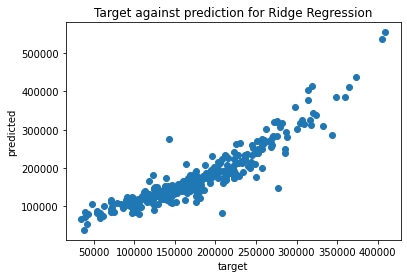

In [24]:
## RIDGE REGRESSION

from sklearn.linear_model import Ridge

model2 = Ridge(alpha=10)

model2.fit(X_train,t_train)

test_score2 = model2.score(X_test,t_test)

y2= model2.predict(X_test)

print(f"Test score/Accuracy: {test_score2}")

# Evaluation metrics
print('\nEVALUATION METRICS:')
print('R2_score: ', r2_score(t_test, y2))
print('MaxErr: ', max_error(t_test,y2))      
print('MAE: ', mean_absolute_error(t_test, y2))
print('MAPE: ', mean_absolute_percentage_error(t_test, y2))      
print('MSE: ', mean_squared_error(t_test, y2))


#Plotting targets against predicted 
plt.scatter(y2,t_test)
plt.xlabel("target")
plt.ylabel("predicted")
plt.title("Target against prediction for Ridge Regression")

# LASSO REGRESSION

Test score/Accuracy: 0.8437576404122049

EVALUATION METRICS:
R2_score:  0.8437576404122049
MaxErr:  144409.60372044996
MAE:  21782.289561851198
MAPE:  0.1367608232780223
MSE:  949653271.4733695


Text(0.5, 1.0, 'Target against prediction for Lasso Regression')

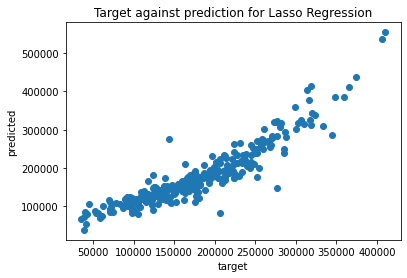

In [25]:
## LASSO REGRESSION

from sklearn.linear_model import Lasso

model3 = Lasso(alpha=0.1)

model3.fit(X_train,t_train)

test_score3 = model3.score(X_test,t_test)

y3= model3.predict(X_test)

print(f"Test score/Accuracy: {test_score3}")

# Evaluation metrics
print('\nEVALUATION METRICS:')
print('R2_score: ', r2_score(t_test, y3))
print('MaxErr: ', max_error(t_test,y3))      
print('MAE: ', mean_absolute_error(t_test, y3))
print('MAPE: ', mean_absolute_percentage_error(t_test, y3))      
print('MSE: ', mean_squared_error(t_test, y1))


#Plotting targets against predicted 
plt.scatter(y3,t_test)
plt.xlabel("target")
plt.ylabel("predicted")
plt.title("Target against prediction for Lasso Regression")

# RANDOM FOREST REGRESSION

Test score/Accuracy: 0.88616280426496

EVALUATION METRICS:
R2_score:  0.88616280426496
MaxErr:  142378.21000000002
MAE:  16940.69544520548
MAPE:  0.10547837816652159
MSE:  691905939.4944715


Text(0.5, 1.0, 'Target against prediction for Random Forest Regression')

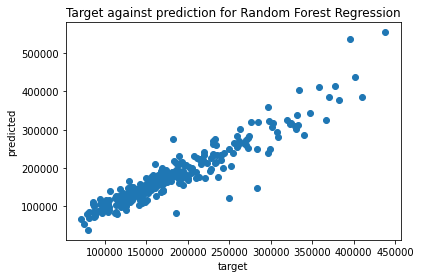

In [26]:
## Random forest Regression

from sklearn.ensemble import RandomForestRegressor


model4 = RandomForestRegressor()

model4.fit(X_train,t_train)

test_score4 = model4.score(X_test,t_test)

y4= model4.predict(X_test)

print(f"Test score/Accuracy: {test_score4}")

# Evaluation metrics
print('\nEVALUATION METRICS:')
print('R2_score: ', r2_score(t_test, y4))
print('MaxErr: ', max_error(t_test,y4))      
print('MAE: ', mean_absolute_error(t_test, y4))
print('MAPE: ', mean_absolute_percentage_error(t_test, y4))      
print('MSE: ', mean_squared_error(t_test, y4))


#Plotting targets against predicted 
plt.scatter(y4,t_test)
plt.xlabel("target")
plt.ylabel("predicted")
plt.title("Target against prediction for Random Forest Regression")

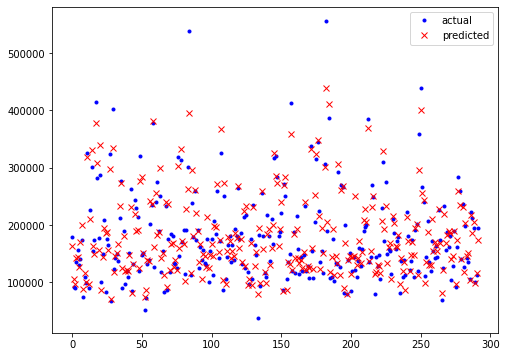

In [27]:
# Finally looking at the predicted and the actual plot of the Random Forest Model 
def targets_preds_plot(y4, t_test):
    plt.figure(figsize=(8,6))
    plt.plot(t_test.values, 'b.', label = 'actual')
    plt.plot(y4, 'rx', label = 'predicted')
    plt.legend()
    return

targets_preds_plot(y4, t_test)